# Time Series Forecasting - Sunspot Data Set

### Sunspots are regions on the Sun's photosphere that appear darker than the surrounding areas on the visible solar disk due to reduced surface temperature associated with concentrations of magnetic field flux and intense magnetic activity on the Sun

In [119]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [120]:
mpl.rcParams['figure.figsize'] = (20, 7)
mpl.rcParams['axes.grid'] = False

In [121]:
df = pd.read_csv('D:/datasets/sunspots.csv')

In [122]:
df

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7
...,...,...,...
3247,3247,2019-08-31,0.5
3248,3248,2019-09-30,1.1
3249,3249,2019-10-31,0.4
3250,3250,2019-11-30,0.5


#### Sunspot Data set has 3525 Rows and 3 Columns

In [123]:
df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [124]:
df.tail()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
3247,3247,2019-08-31,0.5
3248,3248,2019-09-30,1.1
3249,3249,2019-10-31,0.4
3250,3250,2019-11-30,0.5
3251,3251,2019-12-31,1.6


### By Seeing Head nad Tail of Data we can say that
#### - Data is recorded on monthly Basis
#### - It has a Data from mid of 17 th Century to 20th century(Till 2019 Dec,31) - 270 Years Data


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         3252 non-null   int64  
 1   Date                               3252 non-null   object 
 2   Monthly Mean Total Sunspot Number  3252 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 76.3+ KB


#### From the aboove , We can see that Date is in the form of Object
#### Hence we need to convert it to Date Format by below steps

In [126]:
from dateutil.parser import parse
dateparse=lambda dates:parse(dates)

In [127]:
df = pd.read_csv('D:/datasets/sunspots.csv',usecols=['Date','Monthly Mean Total Sunspot Number'],parse_dates=['Date'],date_parser=dateparse)
df.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               3252 non-null   datetime64[ns]
 1   Monthly Mean Total Sunspot Number  3252 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 50.9 KB


#### We have converted the Date from object to Date time  format

In [129]:
df_non_index=df.copy()

In [130]:
df_non_index['Month']=df_non_index.Date.dt.month
df_non_index.head()

,Date,Monthly Mean Total Sunspot Number,Month
0,1749-01-31,96.7,1
1,1749-02-28,104.3,2
2,1749-03-31,116.7,3
3,1749-04-30,92.8,4
4,1749-05-31,141.7,5


#### To ensure the date is a Column not an index we need to perform the above steps
#### Also we are pulling only month from Date Ex : 1749-02-28...in month coulmn we get it has 2
#### - Reason for Seperating is to check the trend on that particular month every year

In [131]:
df_non_index.columns

Index(['Date', 'Monthly Mean Total Sunspot Number', 'Month'], dtype='object')

In [132]:
# Deriving year from the date (1749) --> Deriving the last character (9) --> converting it into int
df_non_index['nth_year'] =[int(str(i)[3]) for i in (df_non_index.Date.dt.year)] # Note this is list comprehension 

# For years like 1950/1970 where the last number is '0', we replace it with '10'
df_non_index['nth_year'].replace(0,10,inplace=True)

df_non_index.head(10)

,Date,Monthly Mean Total Sunspot Number,Month,nth_year
0,1749-01-31,96.7,1,9
1,1749-02-28,104.3,2,9
2,1749-03-31,116.7,3,9
3,1749-04-30,92.8,4,9
4,1749-05-31,141.7,5,9
5,1749-06-30,139.2,6,9
6,1749-07-31,158.0,7,9
7,1749-08-31,110.5,8,9
8,1749-09-30,126.5,9,9
9,1749-10-31,125.8,10,9


#### We have sepeared the last digit of the Year...ie we have take the element at index 3 in the year

In [133]:
df_non_index.tail(20)

,Date,Monthly Mean Total Sunspot Number,Month,nth_year
3232,2018-05-31,13.1,5,8
3233,2018-06-30,15.6,6,8
3234,2018-07-31,1.6,7,8
3235,2018-08-31,8.7,8,8
3236,2018-09-30,3.3,9,8
3237,2018-10-31,4.9,10,8
3238,2018-11-30,4.9,11,8
3239,2018-12-31,3.1,12,8
3240,2019-01-31,7.7,1,9
3241,2019-02-28,0.8,2,9


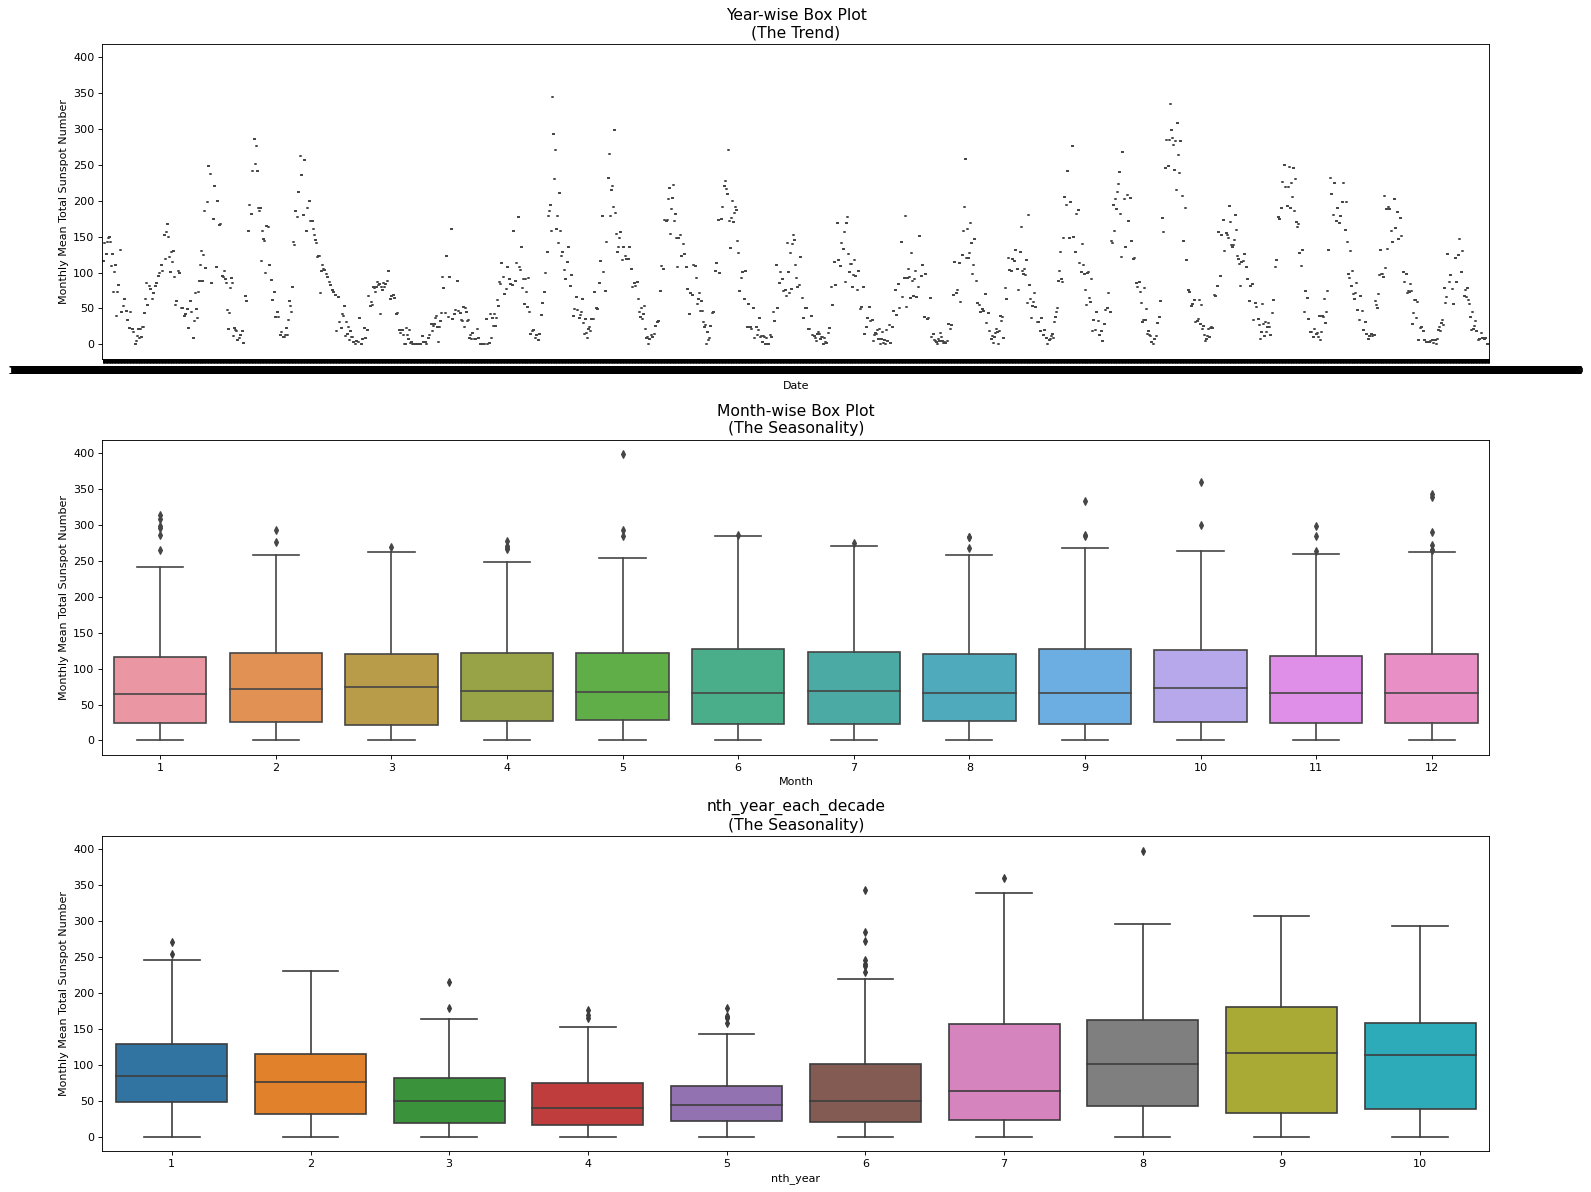

In [134]:
fig, axes = plt.subplots(3, 1, figsize=(20,15), dpi= 80)
sns.boxplot(x='Date', y='Monthly Mean Total Sunspot Number', data=df_non_index, ax=axes[0])
sns.boxplot(x='Month', y='Monthly Mean Total Sunspot Number', data=df_non_index,ax = axes[1])
sns.boxplot(x='nth_year', y='Monthly Mean Total Sunspot Number', data=df_non_index,ax = axes[2])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=14); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=14)
axes[2].set_title('nth_year_each_decade\n(The Seasonality)', fontsize=14)
fig.tight_layout()
plt.show()

#### We have plotted the Box plot for Date, Month and nth Year
#### - By seeing the Monthly box plot  - Mean is alomost same (Negligible Small Variance)
#### - in 3rd Box plots  - 1 box represents values like - 1741,1751,1761 etc and other box plots to follow their respective years
#### - We can see some kind of pattern  and let us see in detail below

In [135]:
df = df.set_index('Date')
df.head()

,Monthly Mean Total Sunspot Number
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


<AxesSubplot:xlabel='Date'>

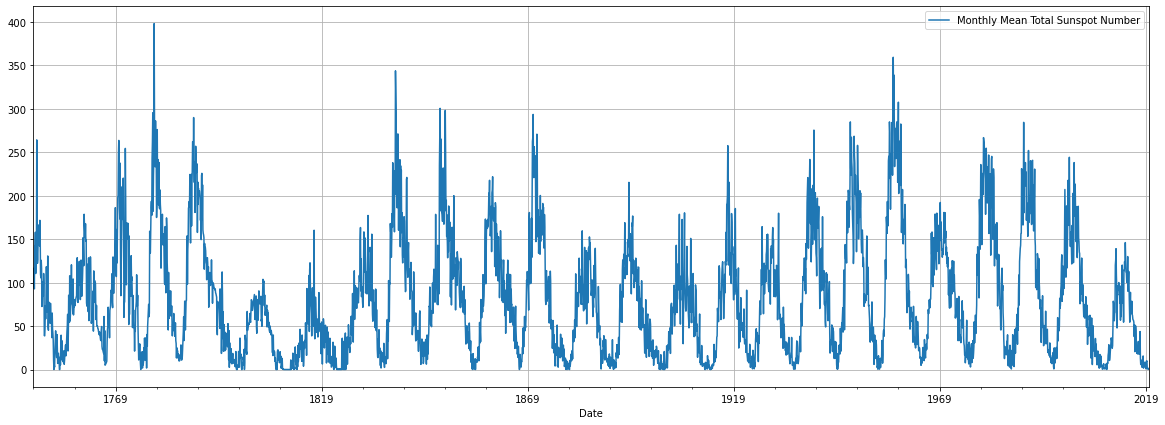

In [136]:
df.plot(grid=True)

#### Monthly Mean Total Sunspot Graph - This is for total 270 Years

<AxesSubplot:xlabel='Date'>

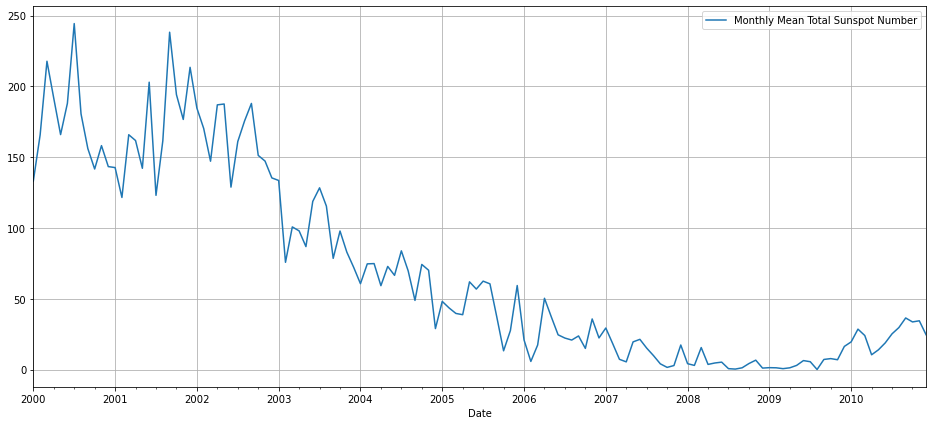

In [137]:
### Let us plot the Monthly Mean Total Sunspot  for 10 years and try to understand the pattern
df_2018=df.loc['2000':'2010']
df_2018.plot(figsize=(16,7),grid=True)

#### We can see the sunspots are at peak during the start of decade and it is declning as the year progress
#### Now let us see the data fro 2 more Decades below and see the pattern

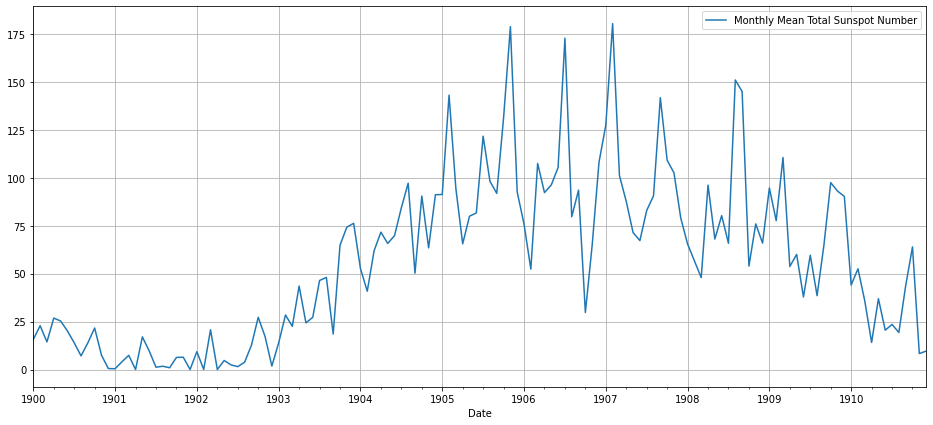

In [66]:
df_2018=df.loc['1900':'1910']
df_2018.plot(figsize=(16,7),grid=True)
plt.show()

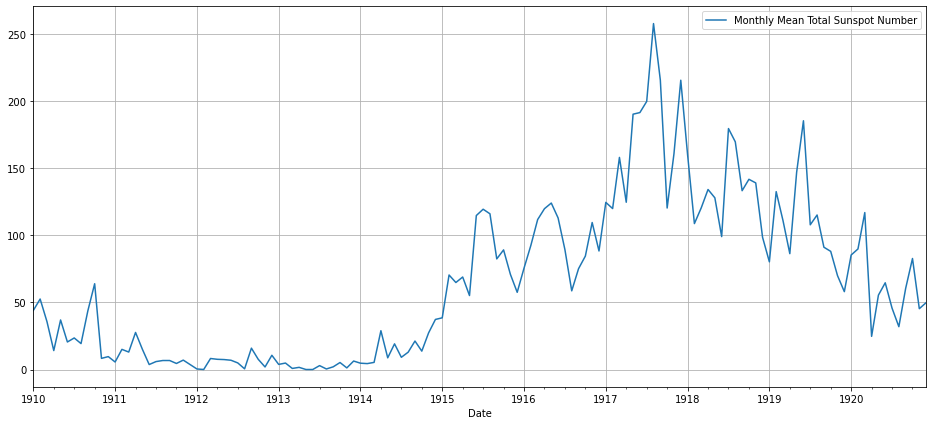

In [67]:
df_191020=df.loc['1910':'1920']
df_191020.plot(figsize=(16,7),grid=True)
plt.show()

In [68]:
df_non_index.head()

,Date,Monthly Mean Total Sunspot Number,Month,nth_year
0,1749-01-31,96.7,1,9
1,1749-02-28,104.3,2,9
2,1749-03-31,116.7,3,9
3,1749-04-30,92.8,4,9
4,1749-05-31,141.7,5,9


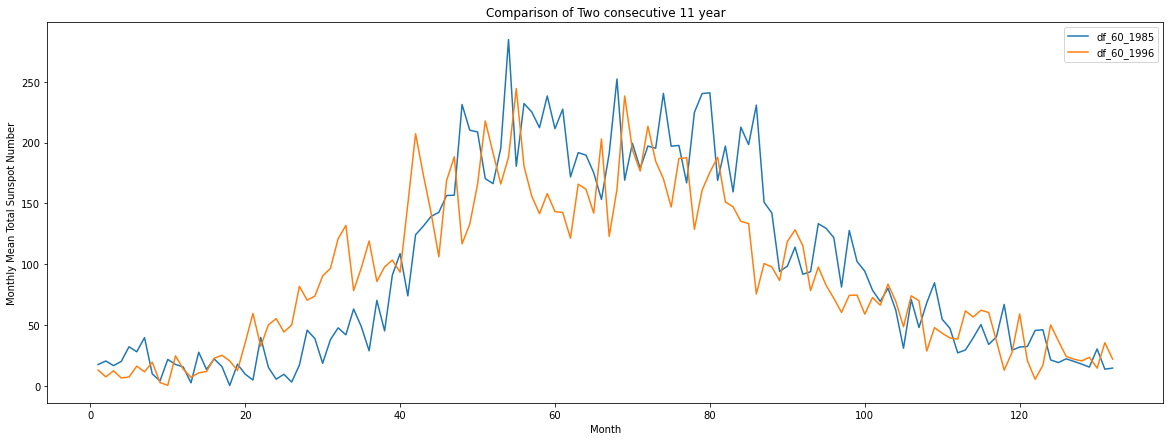

In [69]:
df_11_1985=df_non_index[(df_non_index.Date.dt.year>=1985) & (df_non_index.Date.dt.year<=1995)]
df_11_1996=df_non_index[(df_non_index.Date.dt.year>=1996) &(df_non_index.Date.dt.year<=2006)]

x=np.arange(1,len(df_11_1996['Date'])+1)

plt.plot(x, df_11_1985['Monthly Mean Total Sunspot Number'],label='df_60_1985')
plt.plot(x, df_11_1996['Monthly Mean Total Sunspot Number'],label='df_60_1996')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Monthly Mean Total Sunspot Number')
plt.title('Comparison of Two consecutive 11 year')
plt.show()

### Lag plot
#### It helps to understand the autocorrelation lag, visualizing for few, normally lag greater than 4 is not useful.
#### As we increase the lag time, the correlation is decresing.
#### The data is correlated with its recet time lag upt 4/5 time lag.

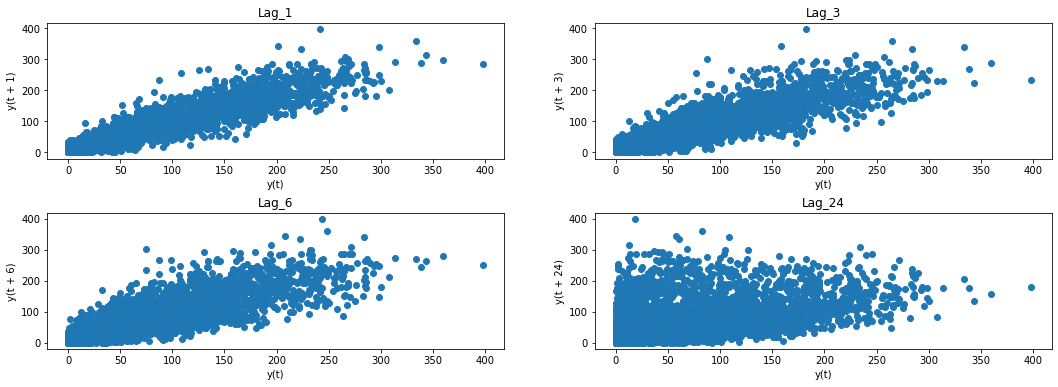

In [70]:
fig=plt.figure(figsize=(18,6))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
ax1=fig.add_subplot(2,2,1)
pd.plotting.lag_plot(df['Monthly Mean Total Sunspot Number'],lag=1)
plt.title('Lag_1')
ax2=fig.add_subplot(2,2,2)
pd.plotting.lag_plot(df['Monthly Mean Total Sunspot Number'],lag=3)
plt.title('Lag_3')
ax3=fig.add_subplot(2,2,3)
pd.plotting.lag_plot(df['Monthly Mean Total Sunspot Number'],lag=6)
plt.title('Lag_6')
ax3=fig.add_subplot(2,2,4)
pd.plotting.lag_plot(df['Monthly Mean Total Sunspot Number'],lag=24)
plt.title('Lag_24')
plt.show()

#### As the time is increasing the co - Relation is decreasing

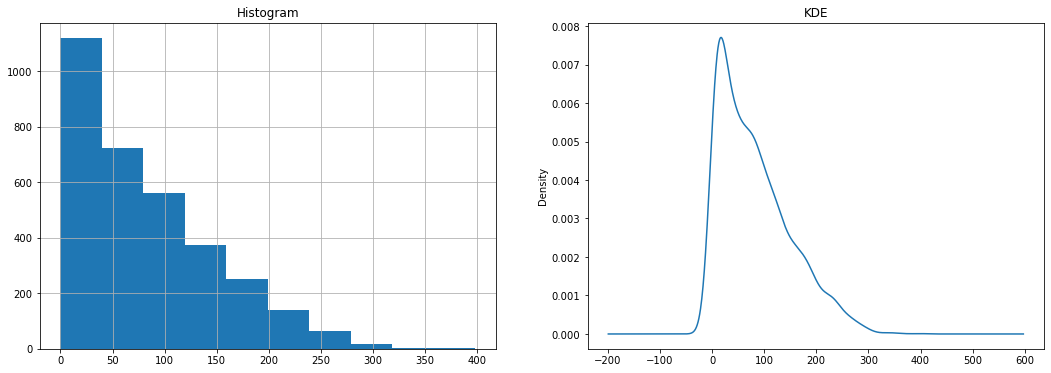

In [71]:
fig=plt.figure(figsize=(18,6))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
ax1=fig.add_subplot(1,2,1)
df['Monthly Mean Total Sunspot Number'].hist()
plt.title('Histogram')
ax2=fig.add_subplot(1,2,2)
df['Monthly Mean Total Sunspot Number'].plot(kind='density')# kernel density plot
plt.title('KDE')
plt.show()

## Testing the Stationarity of data:
### Time series are stationary if they do not have trend or seasonal effects. Summary statistics calculated on the time series are consistent over time, like the mean or the variance of the observations.

### When a time series is stationary, it can be easier to model. Statistical modeling methods assume or require the time series to be stationary to be effective.

In [73]:
from statsmodels.tsa.stattools import adfuller

In [74]:
data_series=df['Monthly Mean Total Sunspot Number']
data_series

Date
1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
              ...  
2019-08-31      0.5
2019-09-30      1.1
2019-10-31      0.4
2019-11-30      0.5
2019-12-31      1.6
Name: Monthly Mean Total Sunspot Number, Length: 3252, dtype: float64

In [75]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(data_series, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.048087e+01
p-value                        1.214714e-18
#Lags Used                     2.800000e+01
Number of Observations Used    3.223000e+03
Critical Value (1%)           -3.432381e+00
Critical Value (5%)           -2.862437e+00
Critical Value (10%)          -2.567248e+00
dtype: float64


In [ ]:
#### Let us see the Hypothesis by using Critical value and real value (or p value )

In [76]:
if dfoutput['Test Statistic'] < dfoutput['Critical Value (5%)']: 
  print('Series is stationary')
else:
  print('Series is not Stationary')

## OR 

if dfoutput[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Series is stationary
Series is Stationary


In [77]:
from statsmodels.tsa.stattools import kpss # Kwiatkowski-Phillips-Schmidt-Shin test for stationarity.

In [78]:
stats, p, lags, critical_values = kpss(df['Monthly Mean Total Sunspot Number'], 'c')

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


In [79]:
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'Critial Values: {critical_values}')

if p < 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: 0.1268441554104963
p-value: 0.1
Critial Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is Stationary


#### Case 1: Both tests conclude that the series is not stationary -> series is not stationary
#### Case 2: Both tests conclude that the series is stationary -> series is stationary
#### Case 3: KPSS = stationary and ADF = not stationary -> trend stationary, remove the trend to make series strict stationary
#### Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series stationary

## Forcasting

## Moving Average:
### The simple moving average (SMA) calculates an average of the last n values, where Px represents the value in a period, and n represents the number of periods. The average "moves" because you are not using all of the data, only recent periods

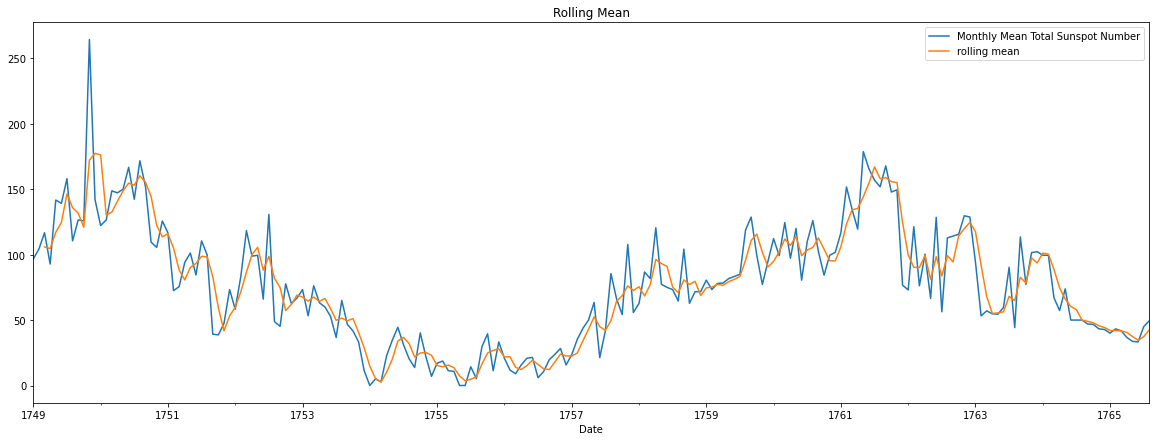

In [80]:
df['Monthly Mean Total Sunspot Number'][:200].plot() 
df['Monthly Mean Total Sunspot Number'][:200].rolling(3).mean().plot(label='rolling mean')

plt.legend()
plt.title('Rolling Mean')

plt.show()

## in above the  we are unable to predict the spikes ...however it is reasonablly fair
## We are giving equal weightage to all the periods

### Weighted Moving Average:
### Weighted moving averages assign a heavier weighting to more current data points since they are more relevant than data points in the distant past.

In [82]:
def wma(weights): 
    def calc(x):
        return (weights*x).mean()
    return calc

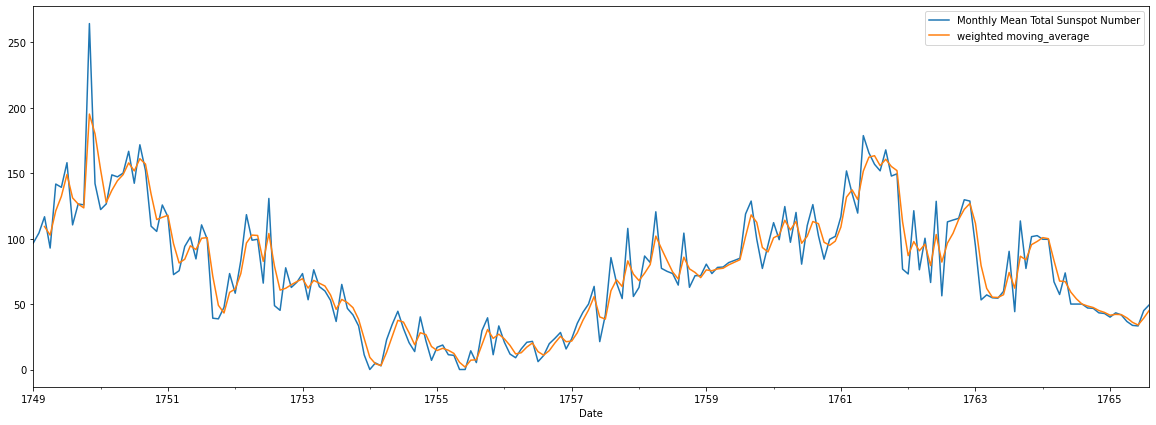

In [83]:
df['Monthly Mean Total Sunspot Number'][:200].plot()
df['Monthly Mean Total Sunspot Number'][:200].rolling(3).apply(wma(np.array([0.5,1,1.5]))).plot(label='weighted moving_average')

plt.legend()
plt.show()

### in the above method we have assigned the weight 50 / 100 / 150 times)
### it is perfomiong well compare to moving average

### Exponential Weighted Moving Average:

#### Exponential moving averages (EMAs) are also weighted toward the most recent prices, but the rate of decrease between one price and its preceding price is not consistent. The difference in the decrease is exponential.

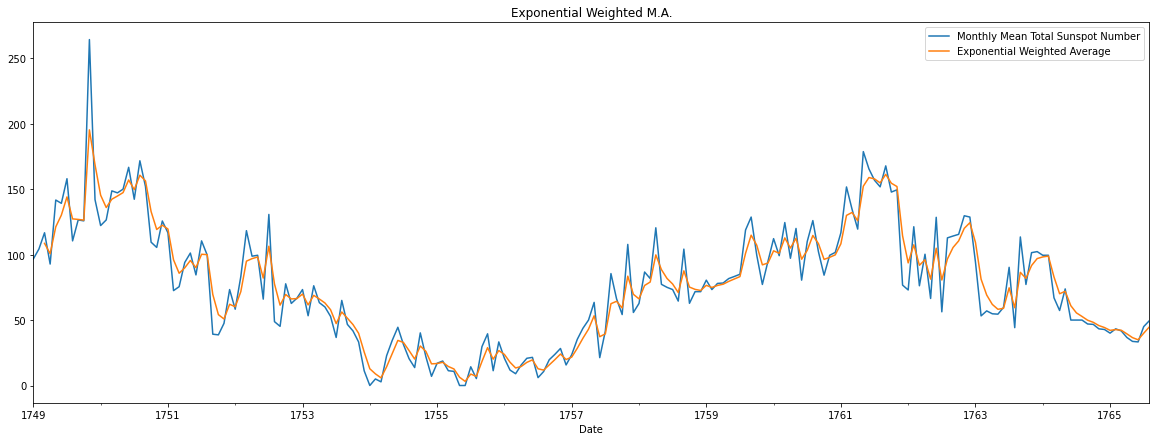

In [84]:
df['Monthly Mean Total Sunspot Number'][:200].plot()
df['Monthly Mean Total Sunspot Number'][:200].ewm(span=3, adjust=False, min_periods=3).mean().plot(label='Exponential Weighted Average')

plt.title('Exponential Weighted M.A.')
plt.legend()
plt.show()

#### Here we assigning the weights exponentially 

### Exponential Smoothing Moving Average:
##### Adding a smoothening factor to EWA

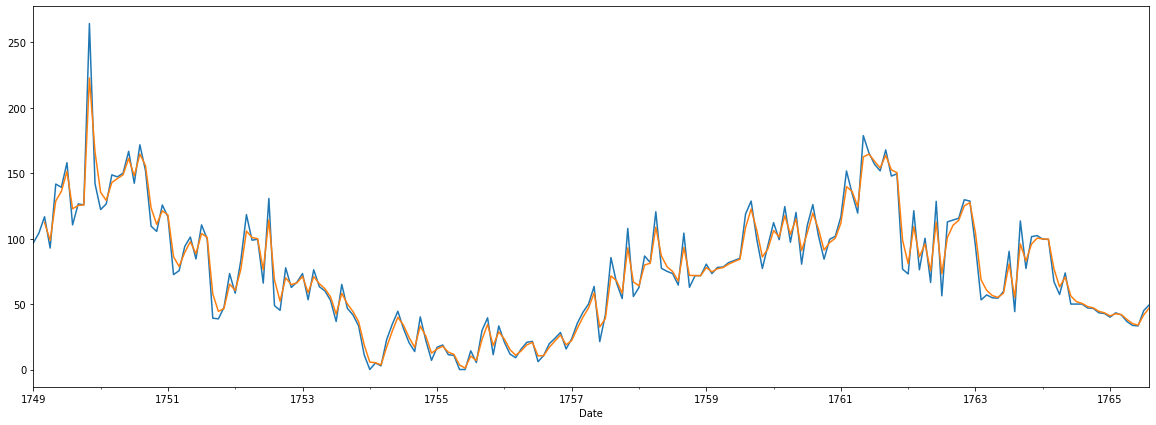

In [86]:
df['Monthly Mean Total Sunspot Number'][:200].plot() # Checking for only first 200 data set
df['Monthly Mean Total Sunspot Number'][:200].ewm(alpha=0.7, adjust=False, min_periods=3).mean().plot(label='Exponential Smooting M A')
plt.show()

            Monthly Mean Total Sunspot Number  Rolling mean       W_M_A  \
Date                                                                      
1749-01-31                               96.7           NaN         NaN   
1749-02-28                              104.3           NaN         NaN   
1749-03-31                              116.7    105.900000  109.233333   
1749-04-30                               92.8    104.600000  102.683333   
1749-05-31                              141.7    117.066667  121.233333   

            E_W_A    E_S_M_A  
Date                          
1749-01-31   96.7        NaN  
1749-02-28  100.5        NaN  
1749-03-31  108.6  112.29600  
1749-04-30  100.7   98.64880  
1749-05-31  121.2  128.78464  


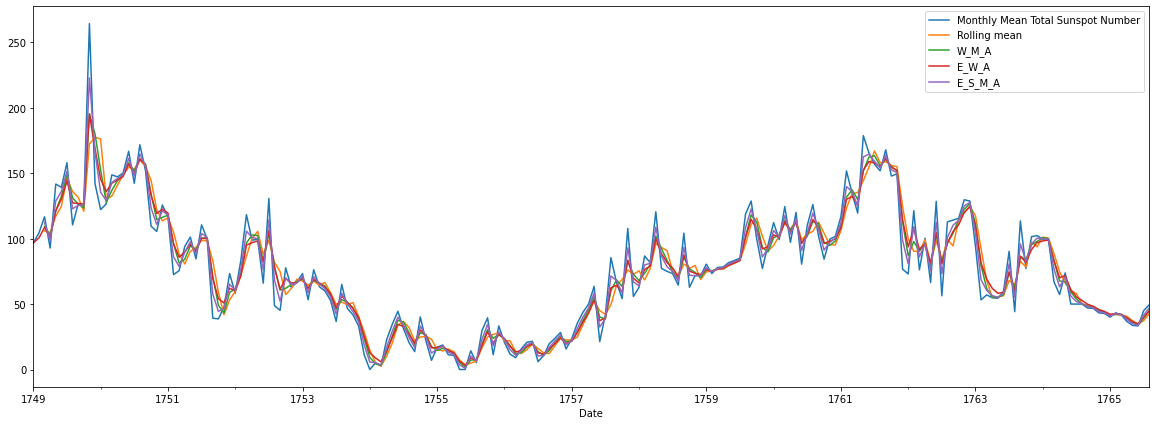

In [87]:
df_with_diff_avg=df[:200].copy()
df_with_diff_avg['Rolling mean']=df['Monthly Mean Total Sunspot Number'][:200].rolling(3).mean()
df_with_diff_avg['W_M_A']= df['Monthly Mean Total Sunspot Number'][:200].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))
df_with_diff_avg['E_W_A']= df['Monthly Mean Total Sunspot Number'][:200].ewm(span=3, adjust=False, min_periods=0).mean()
df_with_diff_avg['E_S_M_A']= df['Monthly Mean Total Sunspot Number'][:200].ewm(alpha=0.7, adjust=False, min_periods=3).mean()
print(df_with_diff_avg.head())

df_with_diff_avg.plot()
plt.show()

In [88]:
df_with_diff_avg.dropna(inplace=True)

In [89]:
df_with_diff_avg.head()

,Monthly Mean Total Sunspot Number,Rolling mean,W_M_A,E_W_A,E_S_M_A
Date,,,,,
1749-03-31,116.7,105.900000,109.233333,108.6,112.296000
1749-04-30,92.8,104.600000,102.683333,100.7,98.648800
1749-05-31,141.7,117.066667,121.233333,121.2,128.784640
1749-06-30,139.2,124.566667,132.300000,130.2,136.075392
1749-07-31,158.0,146.300000,149.016667,144.1,151.422618


In [ ]:
### Let us Calculate RMSE for the above
### RMSE value should be lower 

In [90]:
def RMSE_CAL(df):
      Rolling_Mean_RMSE=np.sqrt(np.sum((df.iloc[:,0]-df.iloc[:,1])**2))
      W_M_A_RMSE=np.sqrt(np.sum((df.iloc[:,0]-df.iloc[:,2])**2))
      E_W_A_RMSE=np.sqrt(np.sum((df.iloc[:,0]-df.iloc[:,3])**2))
      E_S_M_A_RMSE=np.sqrt(np.sum((df.iloc[:,0]-df.iloc[:,4])**2))
      return {"Rolling_Mean_RMSE":Rolling_Mean_RMSE,"W_M_A_RMSE":W_M_A_RMSE,"E_W_A_RMSE":E_W_A_RMSE,"E_S_M_A_RMSE":E_S_M_A_RMSE}
RMSE_CAL(df_with_diff_avg)

{'Rolling_Mean_RMSE': 234.97585928014917,
 'W_M_A_RMSE': 176.54292285761872,
 'E_W_A_RMSE': 170.051001146579,
 'E_S_M_A_RMSE': 105.42272489998321}

In [ ]:
### RMSE value should be lower

<ipython-input-91-32704494d703>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df['Monthly Mean Total Sunspot Number'], model="additive",freq=11*12) #Freq is 11 years and 12 months


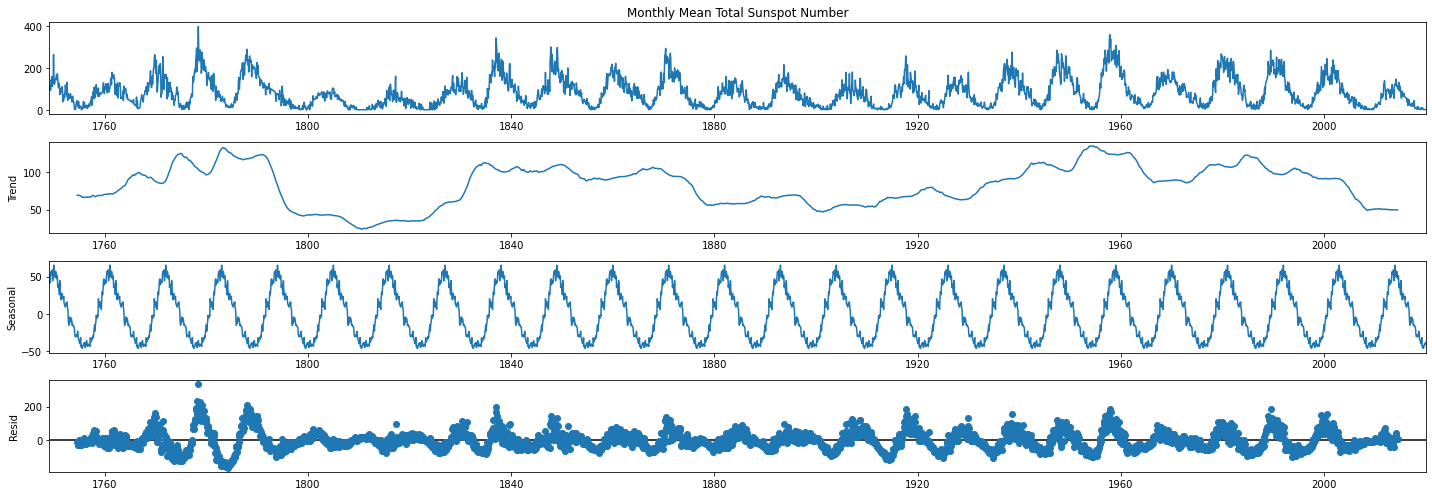

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Monthly Mean Total Sunspot Number'], model="additive",freq=11*12) #Freq is 11 years and 12 months
result.plot()
plt.show()

In [92]:
total_sum=result.trend+result.seasonal+result.resid
total_sum[:100]

Date
1749-01-31     NaN
1749-02-28     NaN
1749-03-31     NaN
1749-04-30     NaN
1749-05-31     NaN
              ... 
1756-12-31    15.7
1757-01-31    23.5
1757-02-28    35.3
1757-03-31    43.7
1757-04-30    50.0
Length: 100, dtype: float64

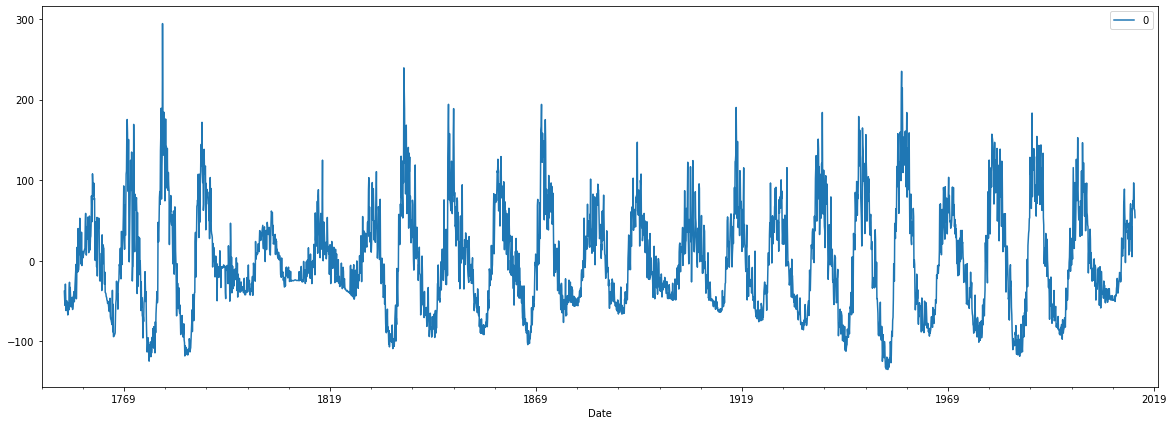

In [93]:
pd.DataFrame(result.observed-result.trend).plot()
plt.show()

In [94]:
df['Monthly Mean Total Sunspot Number'][:100]

Date
1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
              ...  
1756-12-31     15.7
1757-01-31     23.5
1757-02-28     35.3
1757-03-31     43.7
1757-04-30     50.0
Name: Monthly Mean Total Sunspot Number, Length: 100, dtype: float64

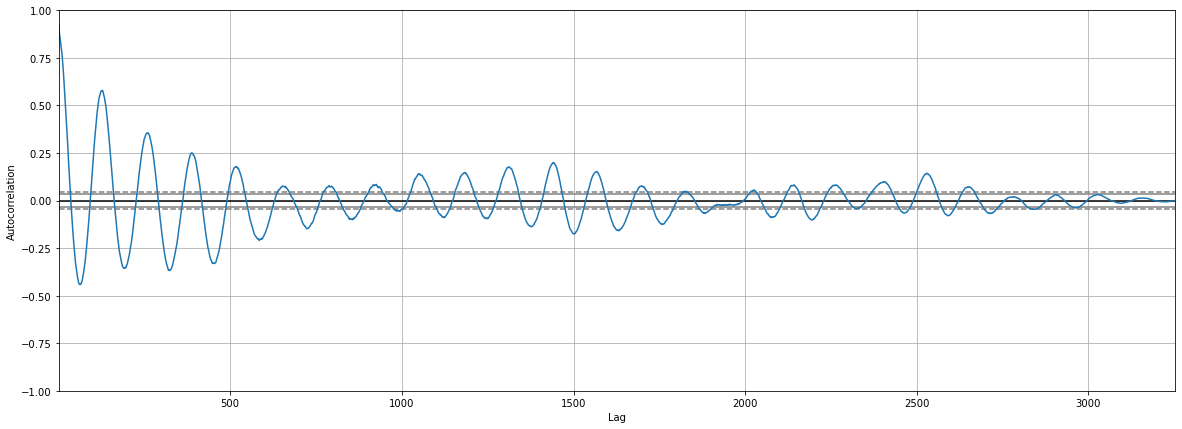

In [95]:
pd.plotting.autocorrelation_plot(df['Monthly Mean Total Sunspot Number']) ## for each month
plt.show()

##### We can that Corelation is decrasing as the Lag Increases

In [96]:
df['Monthly Mean Total Sunspot Number'].resample("1y").mean()

Date
1749-12-31    134.875000
1750-12-31    139.000000
1751-12-31     79.441667
1752-12-31     79.666667
1753-12-31     51.125000
                 ...    
2015-12-31     69.783333
2016-12-31     39.825000
2017-12-31     21.816667
2018-12-31      7.008333
2019-12-31      3.591667
Freq: A-DEC, Name: Monthly Mean Total Sunspot Number, Length: 271, dtype: float64

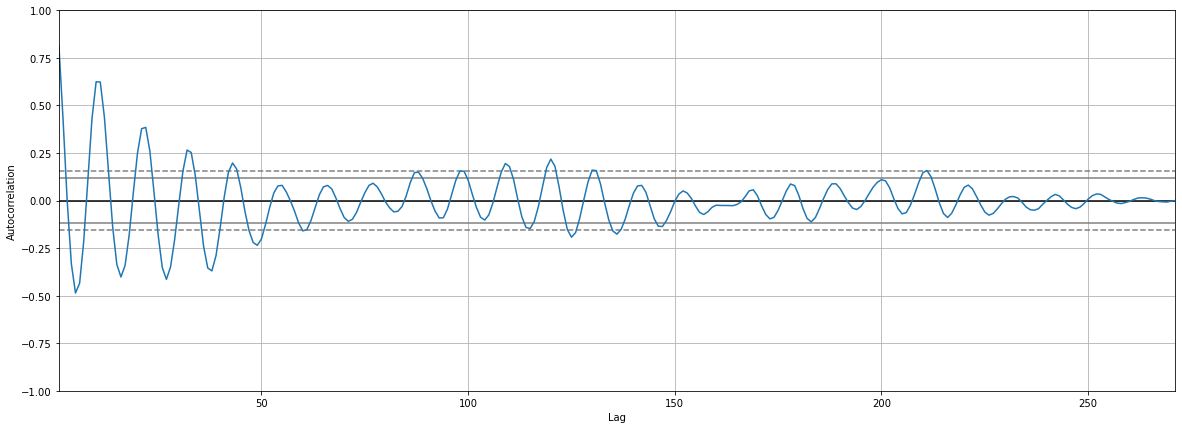

In [97]:
pd.plotting.autocorrelation_plot(df['Monthly Mean Total Sunspot Number'].resample("1y").mean())
plt.show()

In [98]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

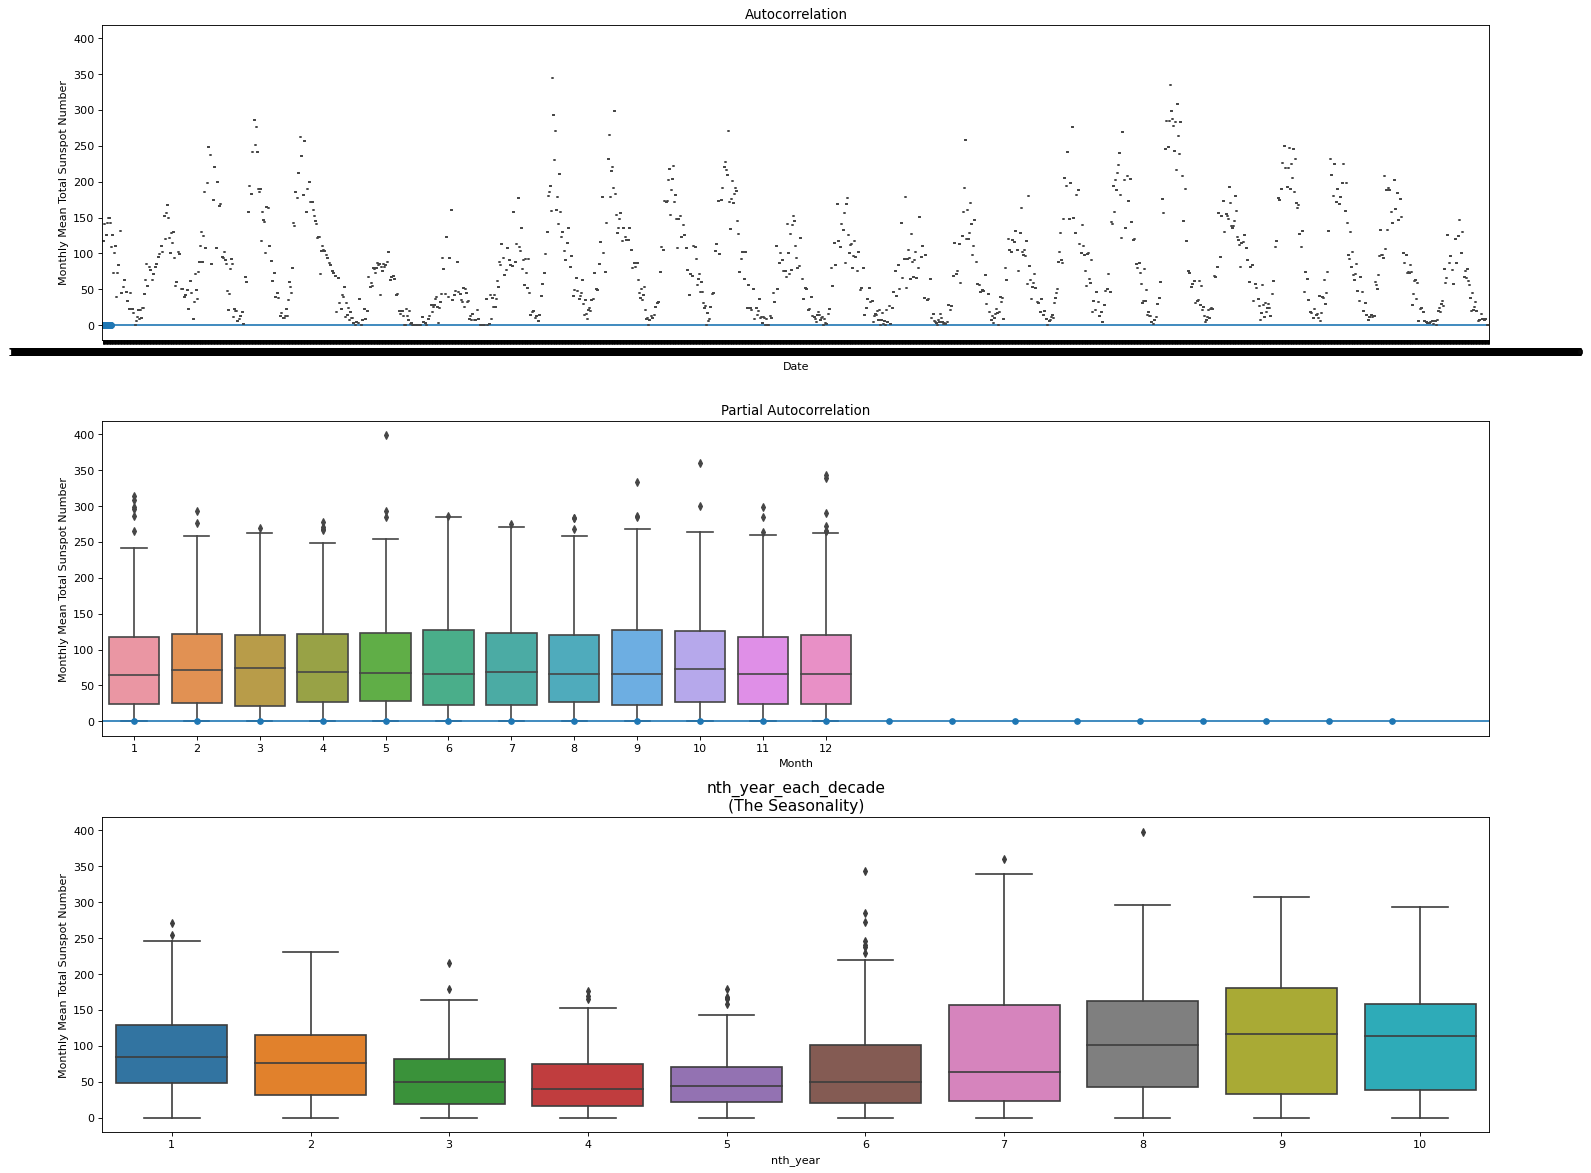

In [99]:
# Draw Plot
plot_acf(df['Monthly Mean Total Sunspot Number'].tolist(), lags=20, ax=axes[0])
plot_pacf(df['Monthly Mean Total Sunspot Number'].tolist(), lags=20, ax=axes[1])

In [100]:
## ARIMA:

#### ARIMA is an acronym which stands for Auto Regressive Integrated Moving Average and is a way of modeling time-series data for forecasting and is specified by three order parameters (p,d,q):

##### AR(p): pattern of growth/decline in the data is accounted for
##### I (d): rate of change of the growth/decline is accounted for
##### MA (q): noise between time points is accounted for

In [103]:
import pmdarima as pm

In [104]:
from pmdarima.model_selection import train_test_split

model = pm.auto_arima(df['Monthly Mean Total Sunspot Number'], 
                        m=11, seasonal=True,
                      start_p=1, start_q=1, max_order=3, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True) 

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[11] intercept   : AIC=30245.684, Time=14.75 sec
 ARIMA(0,0,0)(0,0,0)[11] intercept   : AIC=36662.504, Time=0.15 sec
 ARIMA(1,0,0)(1,0,0)[11] intercept   : AIC=30651.060, Time=6.72 sec
 ARIMA(0,0,1)(0,0,1)[11] intercept   : AIC=33078.193, Time=7.55 sec
 ARIMA(0,0,0)(0,0,0)[11]             : AIC=39591.690, Time=0.10 sec
 ARIMA(1,0,1)(0,0,1)[11] intercept   : AIC=30243.729, Time=7.63 sec
 ARIMA(1,0,1)(0,0,0)[11] intercept   : AIC=30251.533, Time=1.92 sec
 ARIMA(1,0,1)(0,0,2)[11] intercept   : AIC=30245.680, Time=28.00 sec
 ARIMA(1,0,1)(1,0,0)[11] intercept   : AIC=30243.685, Time=7.55 sec
 ARIMA(1,0,1)(2,0,0)[11] intercept   : AIC=30245.684, Time=43.53 sec
 ARIMA(1,0,1)(2,0,1)[11] intercept   : AIC=30247.684, Time=22.99 sec
 ARIMA(0,0,1)(1,0,0)[11] intercept   : AIC=32588.214, Time=4.91 sec
 ARIMA(2,0,1)(1,0,0)[11] intercept   : AIC=30201.764, Time=9.13 sec
 ARIMA(2,0,1)(0,0,0)[11] intercept   : AIC=30212.148, Time=1.81 sec
 

In [105]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 3252
Model:             SARIMAX(3, 0, 2)x(0, 0, [1], 11)   Log Likelihood              -15021.241
Date:                              Sun, 20 Jun 2021   AIC                          30058.483
Time:                                      14:23:30   BIC                          30107.179
Sample:                                           0   HQIC                         30075.927
                                             - 3252                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1287      0.023      5.689      0.000       0.084       0.173
ar.L1          2.3064      0.020    114.148      0.000       2.267       2.346
ar.L2         -1.6384      0.040    -40.644      0.000      -1.717      -1.559
ar.L3          0.3304      0.020     16.178      0.000       0.290       0.370
ma.L1         -1.7813      0.014   -131.379      0.000      -1.808      -1.755
ma.L2          0.8026      0.014     58.767      0.000       0.776       0.829
ma.S.L11       0.0128      0.015      0.866      0.386      -0.016       0.042
sigma2       606.8327      9.859     61.549      0.000     587.509     626.157
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              1555.19
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.55
Prob(H) (two-sided):                  0.22   Kurtosis:                         6.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
df.reset_index(inplace=True)

In [107]:
df.head()

,Date,Monthly Mean Total Sunspot Number
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


In [108]:
train=df[(df.Date.dt.year<1958)]
test=df[(df.Date.dt.year>=1958)]

### We are diving the Data for Train and Test

#### - Data before 1958 Goes for Train
#### - Data after 1958 Goes for Test

In [109]:
(df.Date.dt.year>=1958) & (df.Date.dt.year<1968)

0       False
1       False
2       False
3       False
4       False
        ...  
3247    False
3248    False
3249    False
3250    False
3251    False
Name: Date, Length: 3252, dtype: bool

In [110]:
test1=df[(df.Date.dt.year>=1958) & (df.Date.dt.year<1968)]
n=len(test1)

In [111]:
forecast=model.predict(n_periods=n, return_conf_int=True)

In [112]:
forecast_df = pd.DataFrame(forecast[0],index = test1.index,columns=['Prediction'])
forecast_df.head()

,Prediction
2508,6.495725
2509,9.205983
2510,11.070859
2511,12.776368
2512,14.375061


<AxesSubplot:>

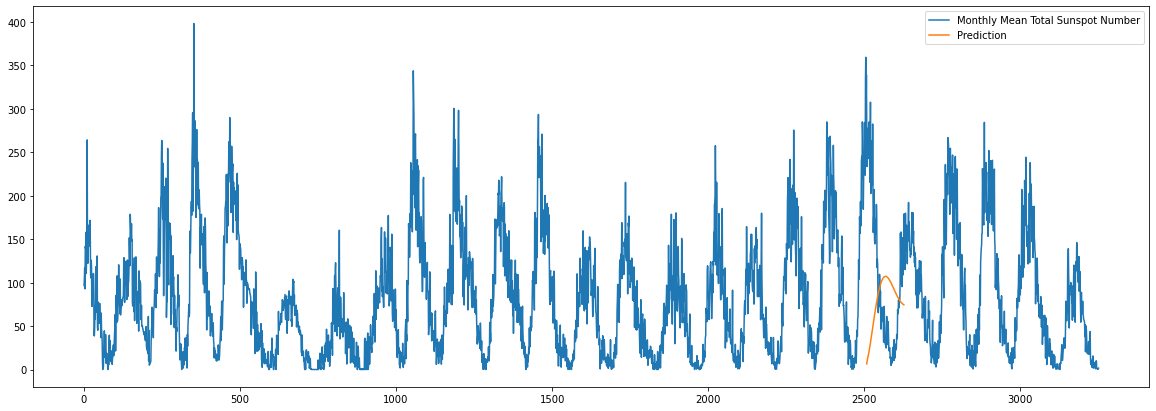

In [113]:
pd.concat([df['Monthly Mean Total Sunspot Number'],forecast_df],axis=1).plot()

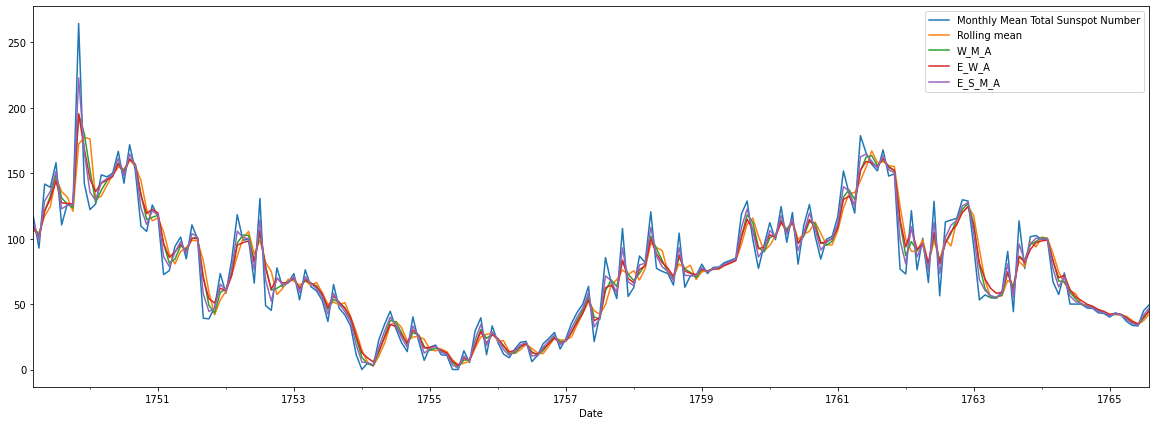

In [114]:
#### Traditional Time Series Forecasting Models:
df_with_diff_avg.plot()
plt.show()

In [140]:
#### Conclusion : Traditional Time Series Forecasting Models fits the best compare to ARIMA


#### Summary : We have succesfully Forcasted the Sun Spot Pattern by using the Time Series